# General Gompertz

https://en.wikipedia.org/wiki/Gompertz_function  

[*********************100%***********************]  1 of 1 completed


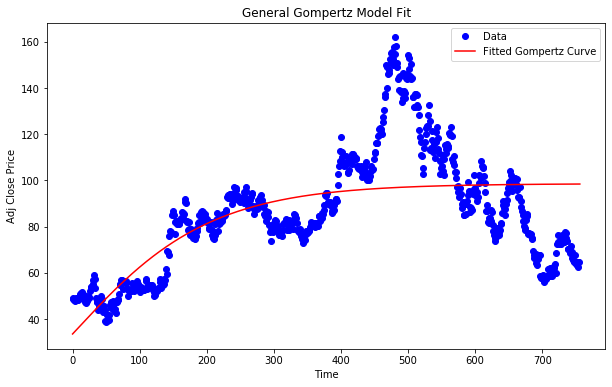

A: 98.62
B: 0.02
C: 0.01
M: 456.01


In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Define the General Gompertz function
def gompertz_function(x, A, B, C, M):
    return A * np.exp(-B * np.exp(-C * (x - M)))

# Fit the Gompertz model to the data
x_data = np.arange(len(data))
initial_guess = (max(data), 0.1, 0.1, len(data) / 2)  # Initial parameter guesses
params, covariance = curve_fit(gompertz_function, x_data, data, p0=initial_guess)

# Extract the fitted parameters
A, B, C, M = params

# Generate curve data for plotting
x_curve = np.linspace(0, len(data), 1000)
y_curve = gompertz_function(x_curve, A, B, C, M)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.plot(x_data, data, 'bo', label='Data')
plt.plot(x_curve, y_curve, 'r-', label='Fitted Gompertz Curve')
plt.xlabel('Time')
plt.ylabel('Adj Close Price')
plt.legend()
plt.title('General Gompertz Model Fit')
plt.show()

# Print the fitted parameters
print(f"A: {A:.2f}")
print(f"B: {B:.2f}")
print(f"C: {C:.2f}")
print(f"M: {M:.2f}")